<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

In [1]:
import warnings
import tensorflow as tf
import pandas as pd
import numpy as np

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (3 Marks)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import json

In [4]:
Sarcasm = []
for line in open('/content/drive/MyDrive/Database/Sarcasm Detection/Sarcasm_Headlines_Dataset.json', 'r'):
    Sarcasm.append(json.loads(line))

In [5]:
Sarcasm[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [6]:
Sarcasm_df = pd.DataFrame.from_dict(Sarcasm, orient='columns')

In [7]:
Sarcasm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [8]:
Sarcasm_df.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


### Drop `article_link` from dataset (3 Marks)

In [9]:
Sarcasm_df.drop(columns='article_link',inplace=True)

In [10]:
Sarcasm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


### Get length of each headline and add a column for that (3 Marks)

In [11]:
Sarcasm_df['len'] = Sarcasm_df['headline'].apply(lambda x: len(x.split()))

In [12]:
Sarcasm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
 2   len           26709 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 626.1+ KB


In [13]:
Sarcasm_df.head(10)

,headline,is_sarcastic,len
0,former versace store clerk sues over secret 'b...,0,12
1,the 'roseanne' revival catches up to our thorn...,0,14
2,mom starting to fear son's web series closest ...,1,14
3,"boehner just wants wife to listen, not come up...",1,13
4,j.k. rowling wishes snape happy birthday in th...,0,11
5,advancing the world's women,0,4
6,the fascinating case for eating lab-grown meat,0,7
7,"this ceo will send your kids to school, if you...",0,14
8,top snake handler leaves sinking huckabee camp...,1,7
9,friday's morning email: inside trump's presser...,0,9


### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [14]:
max_features = 10000
maxlen = 25
embedding_size = 50

### Apply `tensorflow.keras` Tokenizer and get indices for words (4 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [15]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 10000)

tokenizer.fit_on_texts(list(Sarcasm_df['headline']))
X = tokenizer.texts_to_sequences(Sarcasm_df['headline'])

### Pad sequences (4 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen = maxlen)
X.shape

(26709, 25)

### Vocab mapping
- There is no word for 0th index

In [17]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [18]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

29657


### Load Glove Word Embeddings 


In [19]:
#comment it 
text_file = '/content/drive/MyDrive/Database/Sarcasm Detection/glove.6B.50d.txt'

embedding = {}
for o in open(text_file):
  word = o.split(" ")[0]
  emb = o.split(" ")[1:]
  emb = np.asarray(emb,dtype = 'float32')
  #adding to dict
  embedding[word] = emb

### Create embedding matrix

In [20]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 50))

for word, i in tokenizer.word_index.items():
  embedding_vector = embedding.get(word)
  print(embedding_vector)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

Streaming output truncated to the last 5000 lines.
  0.3356   -0.67435  -0.18198   0.16276   2.0366    0.47393  -0.3052
  0.084584 -0.046678  0.73345   0.059697  1.4263    0.34498  -0.15677
  0.94571  -0.046228 -0.019195 -0.82504   0.33696   0.058204 -0.47016
  0.046089 -0.76704  -0.50616  -0.84903   0.10465  -0.31316  -1.7023
  0.19191   0.79202   0.56911  -1.3802   -0.11727   0.20454  -0.70538
  0.14556 ]
[ 0.55478  -0.29268  -0.88738   1.0178    0.20952  -0.19022   1.2048
 -0.25841  -0.028699  0.21777   0.45195   0.21842  -0.4472    0.45343
 -0.80671  -0.26844  -0.2552    1.2716   -0.43709   1.0271   -0.050853
 -1.0638    0.031065  0.8174   -0.98803  -0.64572  -0.39959  -0.3395
 -0.75067  -0.53584   0.55931  -0.018188  0.99454  -0.20821  -0.013172
 -0.24985  -0.4053   -0.89145  -0.22872   0.8655   -0.87034  -0.41307
 -0.30055   0.81612   0.48689  -0.27492   0.0819    0.181     0.10494
  0.05632 ]
[ 4.3379e-01 -1.4638e-01 -6.0452e-01 -2.1792e-01  2.0074e-01 -6.7563e-01
 -7.1609e-01 -

In [21]:
embedding_matrix.shape

(29657, 50)

Target

In [22]:
y = np.asarray(Sarcasm_df['is_sarcastic'])

In [23]:
print(y.shape)

(26709,)


In [24]:
y_en = np.array(tf.one_hot(y,depth=2))

In [25]:
y_en[0]

array([1., 0.], dtype=float32)

In [27]:
y_en[2]

array([0., 1.], dtype=float32)

Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_en,test_size=0.3)

### Define model (5 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Dropout

model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length = maxlen, trainable = False))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='sigmoid'))

### Compile the model (4 Marks)

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics = 'accuracy' )

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 50)            1482850   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               91648     
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

### Fit the model (4 Marks)

In [33]:
from keras.callbacks import History 
history = History()

In [35]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=30, batch_size=100, callbacks = [history])

Epoch 1/30
187/187 [==============================] - 3s 15ms/step - loss: 0.0278 - accuracy: 0.9904 - val_loss: 1.0270 - val_accuracy: 0.8280
Epoch 2/30
187/187 [==============================] - 3s 15ms/step - loss: 0.0312 - accuracy: 0.9897 - val_loss: 1.0744 - val_accuracy: 0.8232
Epoch 3/30
187/187 [==============================] - 3s 15ms/step - loss: 0.0276 - accuracy: 0.9907 - val_loss: 1.2014 - val_accuracy: 0.8263
Epoch 4/30
187/187 [==============================] - 3s 15ms/step - loss: 0.0242 - accuracy: 0.9919 - val_loss: 1.1923 - val_accuracy: 0.8311
Epoch 5/30
187/187 [==============================] - 3s 15ms/step - loss: 0.0240 - accuracy: 0.9911 - val_loss: 1.0943 - val_accuracy: 0.8218
Epoch 6/30
187/187 [==============================] - 3s 15ms/step - loss: 0.0284 - accuracy: 0.9907 - val_loss: 0.9294 - val_accuracy: 0.8272
Epoch 7/30
187/187 [==============================] - 3s 15ms/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 1.2859 - val_accuracy: 0.8360

Predicting Sarcasm for test data, checking accuracy and confusion matrix

In [36]:
predictions = model.predict(X_test)
result = np.argmax(predictions, axis = 1)

In [37]:
result

array([1, 1, 1, ..., 1, 0, 0])

In [38]:
y_test_true = np.argmax(y_test, axis=1)

In [39]:
y_test_true

array([1, 0, 1, ..., 1, 0, 0])

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test_true, result))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4506
           1       0.79      0.85      0.82      3507

    accuracy                           0.84      8013
   macro avg       0.83      0.84      0.83      8013
weighted avg       0.84      0.84      0.84      8013



Display plot of training and validation loss/accuracy wrt to epochs

In [41]:
epochs = range(len(history.history['accuracy']))

<Figure size 432x288 with 0 Axes>

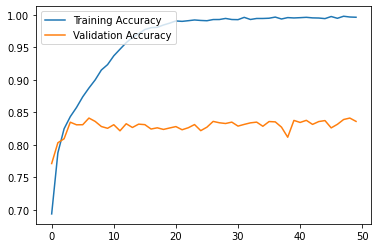

<Figure size 432x288 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt

plt.plot(epochs, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.figure()

<Figure size 432x288 with 0 Axes>

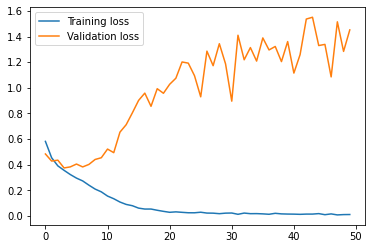

<Figure size 432x288 with 0 Axes>

In [43]:
plt.plot(epochs, history.history['loss'], label = 'Training loss')
plt.plot(epochs, history.history['val_loss'], label = 'Validation loss')
plt.legend(loc = 'upper left')
plt.figure()

We got a validation accuracy of 84%. comparing the loss and accuracy of training and validation, we see a strong case of overfitting here. Also as the number of epochs increase the validation loss increases but the validation accuracy is more or less getting stabilized. 